<table style="width:100%;"/>
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;"/>
            <img src="Figures/Logo_Combined.png" width="350" alt="logo" align="left"/>
        </td/>
        <td style="width:20%; text-align:left; vertical-align: top;"/>
            Biochemical Engineering Lab<br/>
            & Janssen Cilag AG<br/>
        </td/>
    </tr/>
</table/>

<center> 
    <h1>Master Thesis on Protein Aggregation: NTA Analysis </h1>
    <h3>by Eduard Meier</h3><br/>
</center>

In [1]:
# Import python libraries used in the following
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
import pathlib
import fcsparser
import FlowCytometryTools as fct

#plt.rcParams['image.cmap']='magma'

#plt.rcParams.update({
#'text.usetex': True,
#'font.family': 'serif',
#'font.size'  : 15,
#'font.serif': ['Computern Modern Roman'],
#})

"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

print('Current working directory: ')
os.getcwd()

Current working directory: 


'/Users/eduardmeier/Desktop/MasterThesis_DataAnalysis/03_JupyterNotebooks'

In [2]:
def extractData(csvFiles):
    
    dataFrame = {}
    
    for csvFile in csvFiles:
        
        csvName = pathlib.PurePath(csvFile).name[:-15]

        # Read CSV-file
        dataFrame[csvName] = pd.read_csv(csvFile, sep=',')
            
    return dataFrame

In [3]:
csvFiles = sorted(glob.glob(os.path.join('..', '01_Data', '06_NTA', '02_Processed', '01_CSV', '*.csv')))

print(csvFiles)

df = extractData(csvFiles)

['../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_000rpm_00-00min_NA_No1_230906.csv', '../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_300rpm_20-00min_ST_No1_230906.csv', '../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_300rpm_40-00min_ST_No1_230906.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_000rpm_00-00min_NA_No1_230829.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_20-00min_PM_No1_230829.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_20-00min_ST_No1_230829.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_40-00min_PM_No1_230829.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_40-00min_ST_No1_230829.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_000rpm_00-00min_NA_230831.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_300rpm_20-00min_ST_230831.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_300rpm_40-00min_ST_230831.csv', '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug

In [4]:
df['EVs_3e10_300rpm_40-00min_ST'].head

<bound method NDFrame.head of      Size / nm  Number  Concentration / cm-3  Volume / nm^3  Area / nm^2
0         15.0     1.0               43500.0         1770.0        177.0
1         45.0     2.0               87000.0        95400.0       3180.0
2         75.0    37.0             1610000.0      8170000.0     164000.0
3        105.0    45.0             1960000.0     27300000.0     390000.0
4        135.0    55.0             2390000.0     70900000.0     787000.0
..         ...     ...                   ...            ...          ...
195     5870.0     0.0                   0.0            0.0          0.0
196     5900.0     0.0                   0.0            0.0          0.0
197     5930.0     0.0                   0.0            0.0          0.0
198     5960.0     0.0                   0.0            0.0          0.0
199     5990.0     0.0                   0.0            0.0          0.0

[200 rows x 5 columns]>

## Calculations

## Plots

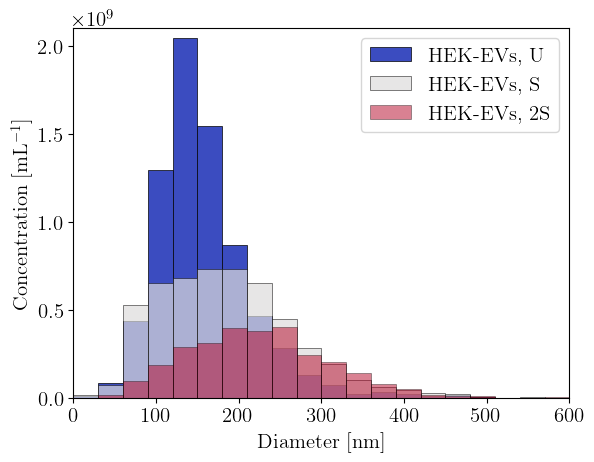

In [5]:
csvFilesPure = ['../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_40-00min_ST_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_40-00min_PM_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_000rpm_00-00min_NA_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_20-00min_ST_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_20-00min_PM_No1_230829.csv']

csvFilesSorted = sorted(csvFilesPure)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,5)))

fig, ax = plt.subplots()

dilFact = [100, 100, 100, 100, 100]

for i, csvFile in enumerate(csvFilesSorted):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, 
               alpha=1, linewidth=0.5, edgecolor='black', 
               color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 1:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30,
               alpha=0.7, linewidth=0.5, edgecolor='black', 
               color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i+1])
        
    elif i == 3:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, 
               alpha=0.5, linewidth=0.5, edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i+1])

        ax.set_xlabel(r'Diameter [nm]')
        ax.set_ylabel(r'Concentration [mL$^{-1}$]')
     
ax.set_xlim([0, 600])
ax.set_ylim([0, 2.1e9])

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)


ax.legend(['HEK-EVs, U', 'HEK-EVs, S', 'HEK-EVs, 2S'])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'EVs_PMMA' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'EVs_PMMA' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

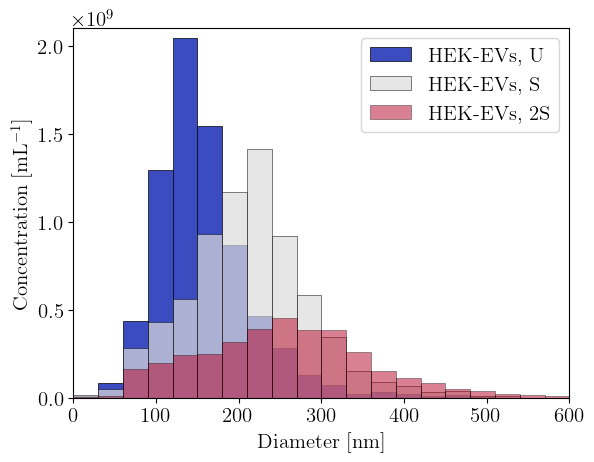

In [6]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,5)))

fig, ax = plt.subplots()

dilFact = [100, 100, 100, 100, 100]

for i, csvFile in enumerate(csvFilesSorted):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 2:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.7, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 4:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.5, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

        ax.set_xlabel(r'Diameter [nm]')
        ax.set_ylabel(r'Concentration [mL$^{-1}$]')
     
ax.set_xlim([0, 600])
ax.set_ylim([0, 2.1e9])

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

ax.legend(['HEK-EVs, U', 'HEK-EVs, S', 'HEK-EVs, 2S'])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'EVs_ST' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'EVs_ST' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

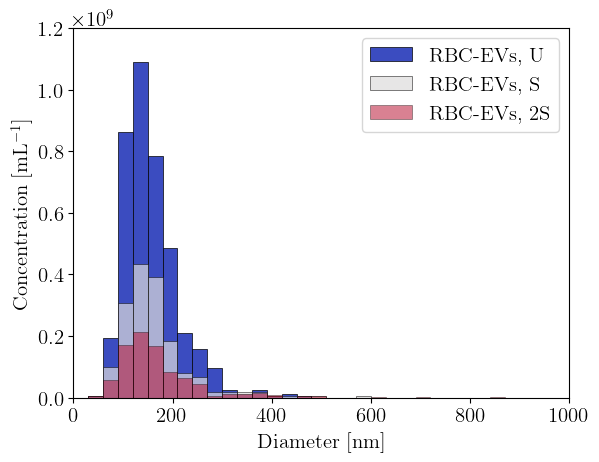

In [7]:
csvFilesPure = ['../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_000rpm_00-00min_NA_No1_230906.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_300rpm_20-00min_ST_No1_230906.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_300rpm_40-00min_ST_No1_230906.csv']

csvFilesSorted = sorted(csvFilesPure)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))

fig, ax = plt.subplots()

dilFact = [100, 100, 33.3]

for i, csvFile in enumerate(csvFilesSorted):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 1:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.7, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 2:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.5, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

        ax.set_xlabel(r'Diameter [nm]')
        ax.set_ylabel(r'Concentration [mL$^{-1}$]')
     
ax.set_xlim([0, 1000])
ax.set_ylim([0, 1.2e9])

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

ax.legend(['RBC-EVs, U', 'RBC-EVs, S', 'RBC-EVs, 2S'])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'BVs_ST' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'BVs_ST' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

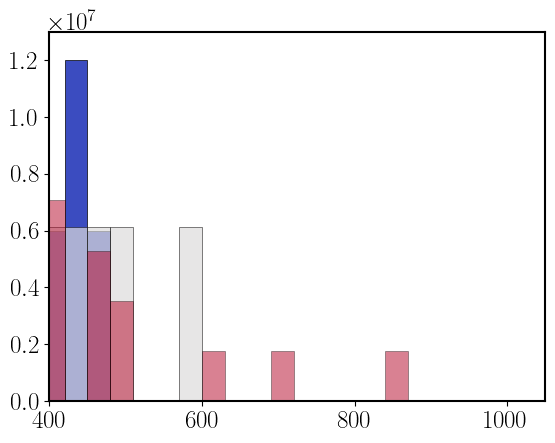

In [8]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 18,
'font.sans-serif': ['Arial'],
})
"""
plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 18,
'font.serif': ['Computern Modern Roman'],
})

csvFilesPure = ['../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_000rpm_00-00min_NA_No1_230906.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_300rpm_20-00min_ST_No1_230906.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/BVs_3e10_300rpm_40-00min_ST_No1_230906.csv']

csvFilesSorted = sorted(csvFilesPure)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))

fig, ax = plt.subplots()

dilFact = [100, 100, 33.3]

for i, csvFile in enumerate(csvFilesSorted):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 1:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.7, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 2:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.5, linewidth=0.5,
              edgecolor='black', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
     
ax.set_xlim([400, 1050])
ax.set_ylim([0, 1.3e7])

ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

#ax.legend(['RBC-EVs, U', 'RBC-EVs, S', 'RBC-EVs, 2S'])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'BVs_ST_Zoom' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'BVs_ST_Zoom' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

## EVs + BSA Aggregation

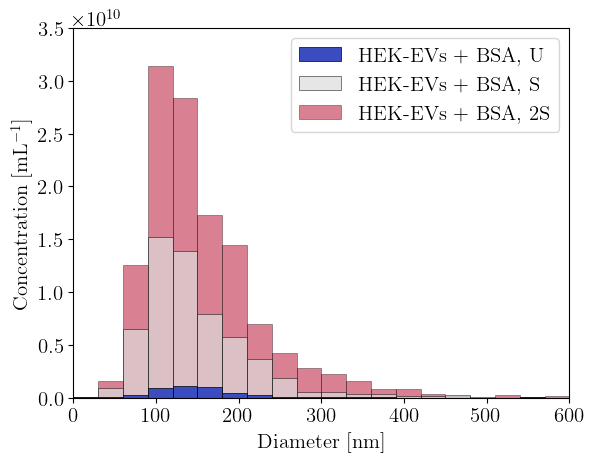

In [15]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

csvFilesBSA = ['../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_000rpm_00-00min_NA_230831.csv', 
               '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_300rpm_20-00min_ST_230831.csv', 
               '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_300rpm_40-00min_ST_230831.csv']

csvFilesSorted = sorted(csvFilesBSA)

dilFact = [100, 1000, 2000]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,5)))

fig, ax = plt.subplots()

for i, csvFile in reversed(list(enumerate(csvFilesSorted))):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black',  label='HEK-EVs + BSA, U', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 1:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.7, linewidth=0.5,
              edgecolor='black', label='HEK-EVs + BSA, S', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i+1])
        
    elif i == 2:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.5, linewidth=0.5,
              edgecolor='black', label='HEK-EVs + BSA, 2S', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i+2])

        ax.set_xlabel(r'Diameter [nm]')
        ax.set_ylabel(r'Concentration [mL$^{-1}$]')
     
ax.set_xlim([0, 600])
ax.set_ylim([0, 3.5e10])

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'EVs_BSA_ST' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'EVs_BSA_ST' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

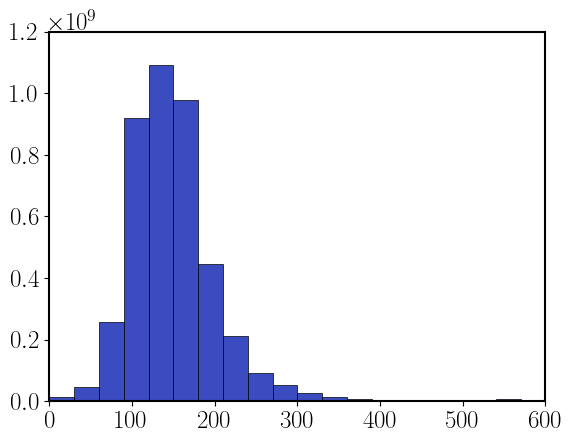

In [10]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 18,
'font.sans-serif': ['Arial'],
})
"""
plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 18,
'font.serif': ['Computern Modern Roman'],
})

csvFilesBSA = ['../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_000rpm_00-00min_NA_230831.csv', 
               '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_300rpm_20-00min_ST_230831.csv', 
               '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_BSA_010mg_300rpm_40-00min_ST_230831.csv']

csvFilesSorted = sorted(csvFilesBSA)

dilFact = [100, 1000, 2000]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,5)))

fig, ax = plt.subplots()

ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

for i, csvFile in reversed(list(enumerate(csvFilesSorted))):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black', label='EVs + BSA, Unsheared', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
     
ax.set_xlim([0, 600])
ax.set_ylim([0, 1.2e9])


ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'EVs_BSA_unsheared_ST' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'EVs_BSA_unsheared_ST' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

## EVs + PS20

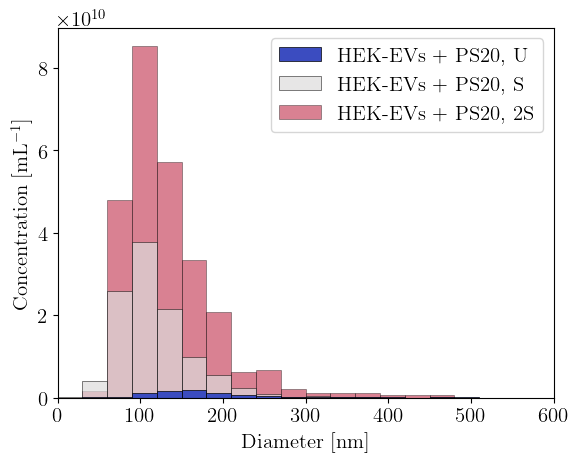

In [11]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

csvFilesPure = ['../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug_000rpm_00-00min_NA_No1_230918.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug_300rpm_20-00min_ST_No1_230918.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug_300rpm_40-00min_ST_No1_230918.csv']

csvFilesSorted = sorted(csvFilesPure)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,3)))

fig, ax = plt.subplots()

dilFact = [100, 1000, 10000]

for i, csvFile in reversed(list(enumerate(csvFilesSorted))):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black', label='HEK-EVs + PS20, U', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 1:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.7, linewidth=0.5,
              edgecolor='black', label='HEK-EVs + PS20, S', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        
    elif i == 2:
        
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=0.5, linewidth=0.5,
              edgecolor='black', label='HEK-EVs + PS20, 2S', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])

        ax.set_xlabel(r'Diameter [nm]')
        ax.set_ylabel(r'Concentration [mL$^{-1}$]')
     
ax.set_xlim([0, 600])
#ax.set_ylim([0, 1.2e9])

ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'EVs_PS20_ST' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'EVs_PS20_ST' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

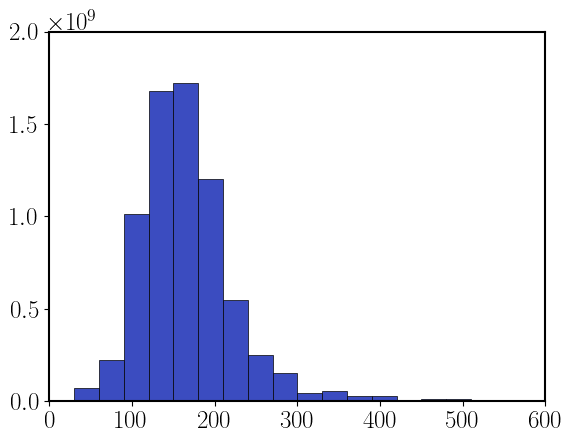

In [12]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 18,
'font.sans-serif': ['Arial'],
})
"""
plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 18,
'font.serif': ['Computern Modern Roman'],
})

csvFilesPure = ['../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug_000rpm_00-00min_NA_No1_230918.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug_300rpm_20-00min_ST_No1_230918.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_PS2_500ug_300rpm_40-00min_ST_No1_230918.csv']

csvFilesSorted = sorted(csvFilesPure)

dilFact = [100, 1000, 2000]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,5)))

fig, ax = plt.subplots()

ax = fig.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

for i, csvFile in reversed(list(enumerate(csvFilesSorted))):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    if i == 0:
    
        ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30, alpha=1, linewidth=0.5,
              edgecolor='black', label='HEK-EVs + PS20, Unsheared', color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
     
ax.set_xlim([0, 600])
ax.set_ylim([0, 2e9])


ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1])

fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', 'EVs_PS20_unsheared_ST' + '.pdf')
fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', 'EVs_PS20_unsheared_ST' + '.png')

plt.savefig(fileNamePdf, bbox_inches='tight')
plt.savefig(fileNamePng, bbox_inches='tight')

plt.show()

## Alternative Plots

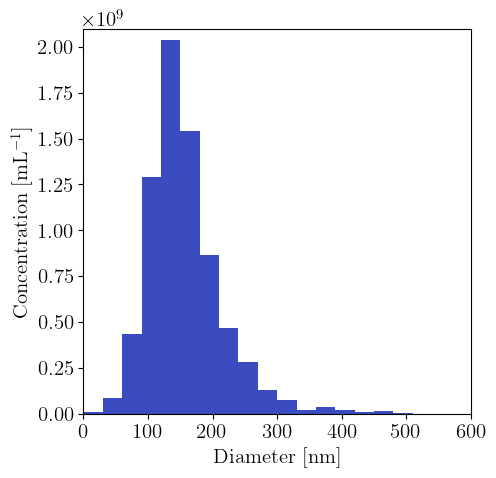

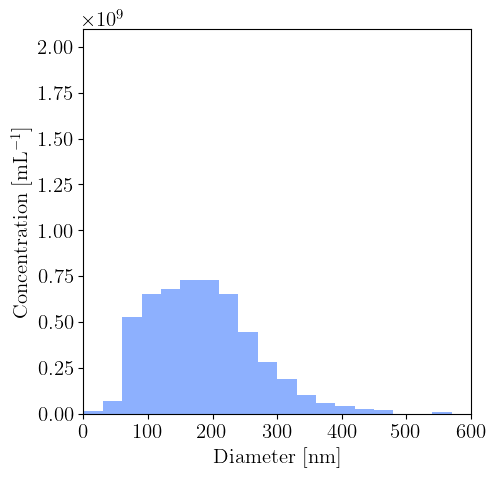

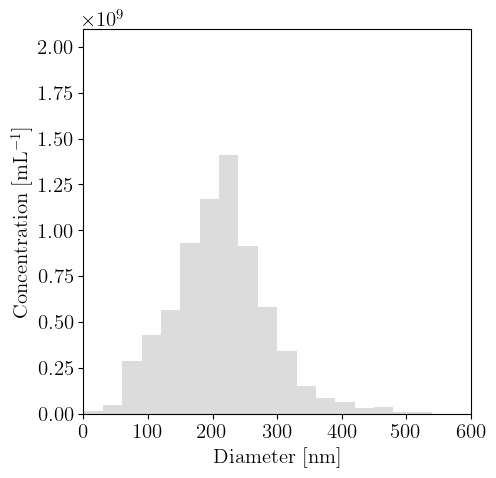

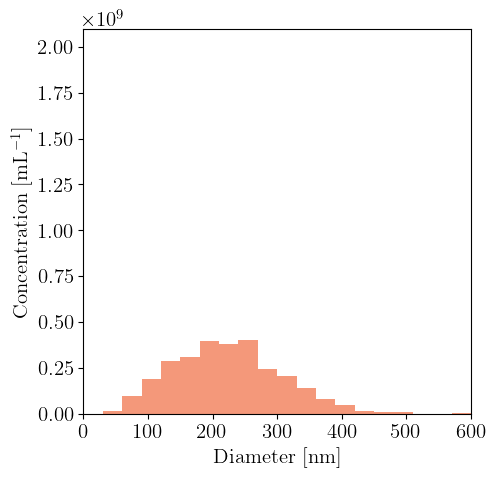

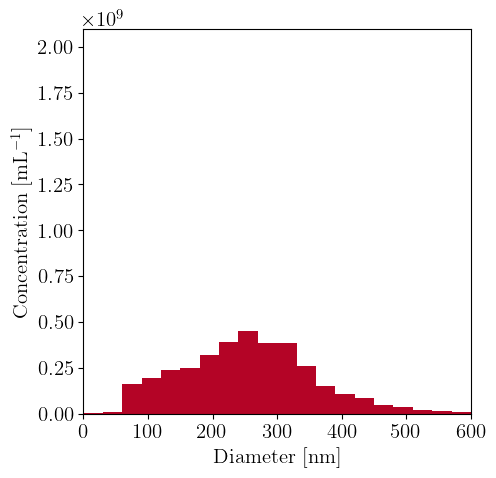

In [13]:
"""
plt.rcParams.update({
'text.usetex': False,
'font.family': 'sans-serif',
'font.size'  : 15,
'font.sans-serif': ['Arial'],
})
"""

plt.rcParams.update({
'text.usetex': True,
'font.family': 'serif',
'font.size'  : 15,
'font.serif': ['Computern Modern Roman'],
})

csvFilesPure = ['../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_40-00min_ST_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_40-00min_PM_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_000rpm_00-00min_NA_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_20-00min_ST_No1_230829.csv', 
                '../01_Data/06_NTA/02_Processed/01_CSV/EVs_3e10_300rpm_20-00min_PM_No1_230829.csv']

csvFilesSorted = sorted(csvFilesPure)

dilFact = [100, 100, 100, 100, 100]

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,5)))

for i, csvFile in enumerate(csvFilesSorted):
        
    csvName = pathlib.PurePath(csvFile).name[:-15]

    fig, ax = plt.subplots(figsize=(5,5))

    ax.bar(df[csvName]['Size / nm'], dilFact[i]*df[csvName]['Concentration / cm-3'], width=30,
          color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
    
    ax.set_xlim([0, 600])
    
    ax.set_xlabel(r'Diameter [nm]')
    ax.set_ylabel(r'Concentration [mL$^{-1}$]')
    
    ax.set_ylim([0, 2.1e9])
    
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

    fileNamePdf = os.path.join('..', '02_Plots', '06_NTA', '01_PDF', csvName + '.pdf')
    fileNamePng = os.path.join('..', '02_Plots', '06_NTA', '02_PNG', csvName + '.png')

    plt.savefig(fileNamePdf, bbox_inches='tight')
    plt.savefig(fileNamePng, bbox_inches='tight')

    plt.show()